In [1]:
import torch
from torch import nn
#
from model import IRMAE, ConvAutoEncoder
from dataset import get_dataset
from train import test

## Load Model Checkpoint and data

In [2]:
model = IRMAE()
ckpt_path = 'ckpts/e050irmae_mnist.pt'
ckpt = torch.load(ckpt_path)
model.load_state_dict(ckpt)

<All keys matched successfully>

In [3]:
# you can skip, compare with vanilla autoencoder
ae_model = ConvAutoEncoder()
ckpt_path = '../ae/ckpts/e050ae_mnist.pt'
ckpt = torch.load(ckpt_path)
ae_model.load_state_dict(ckpt)

<All keys matched successfully>

In [4]:
train_data, test_data = get_dataset('mnist')
criterion = nn.MSELoss()

In [5]:
print('IRMAE Test loss')
test(model.to('cuda'), test_data, 0, criterion, device=torch.device('cuda'))

IRMAE Test loss


100%|██████████| 157/157 [00:00<00:00, 243.00it/s]


0.002452994358672458

In [6]:
# you can skip, compare with vanilla autoencoder
print('Vanilla AE Test loss')
test(ae_model.to('cuda'), test_data, 0, criterion, device=torch.device('cuda'))

Vanilla AE Test loss


100%|██████████| 157/157 [00:00<00:00, 249.46it/s]


0.0009967916742246005

In [7]:
iter_d = iter(test_data)
i1 = iter_d.next()[0][0]
i2 = iter_d.next()[0][5]

In [8]:
import matplotlib.pyplot as plt

In [9]:
def im_show(data):
    plt.axis('off')
    return plt.imshow(data.squeeze(), cmap='gray')

### Mix two raw picture's pixels

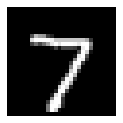

In [10]:
plt.figure(figsize=(2, 2))
im_show(i1)

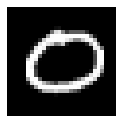

In [11]:
plt.figure(figsize=(2, 2))
im_show(i2)

Directly combine two pictures

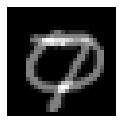

In [12]:
plt.figure(figsize=(2, 2))
im_show(((i1 + i2) / 2))

In [15]:
model = model.to('cpu')

In [16]:
# you can skip, compare with vanilla autoencoder
ae_model = ae_model.to('cpu')

## Interpolution

### extract two latent from our model

In [17]:
z1 = model.w_layers(model.encoder(i1.unsqueeze(dim=0)))
z2 = model.w_layers(model.encoder(i2.unsqueeze(dim=0)))

In [18]:
# you can skip, compare with vanilla autoencoder
vz1 = ae_model.encoder(i1.unsqueeze(dim=0))
vz2 = ae_model.encoder(i2.unsqueeze(dim=0))

### Reconstruct to check model

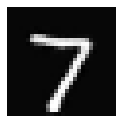

In [19]:
plt.figure(figsize=(2, 2))
im_show(model.decoder(z1).detach())

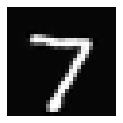

In [20]:
# you can skip, vanilla reconstruct version
plt.figure(figsize=(2, 2))
im_show(ae_model.decoder(ae_model.encoder(i1.unsqueeze(dim=0))).detach())

### mix two latent with different ratio

And throw back into our decoder

In [30]:
def print_z1z2(model, z1, z2):
    plt.figure(figsize=(20, 10))
    for i in range(0, 10 + 1):
        r1 = (10 - i) * 0.1
        r2 = 1 - r1
        z = z1 * r1 + z2 * r2

        plt.subplot(1, 11, i + 1)
        plt.title('r1={:.02}, r2={:.02}'.format(r1, r2))
        im_show(model.decoder(z).detach())
    plt.show()

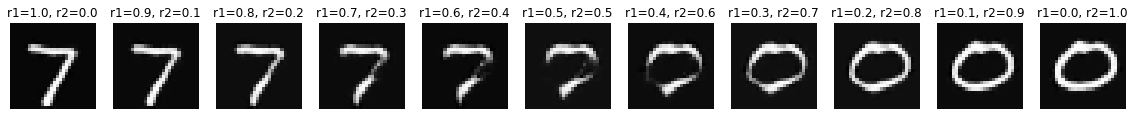

In [31]:
print_z1z2(model, z1, z2)

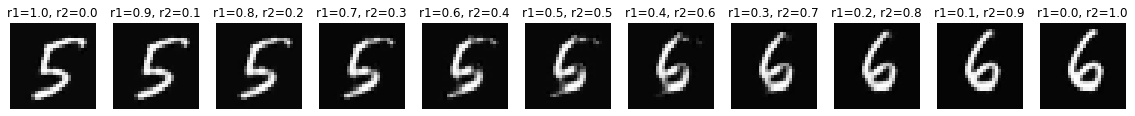

In [32]:
# you can skip, compare with vanilla autoencoder
print_z1z2(ae_model, vz1, vz2)

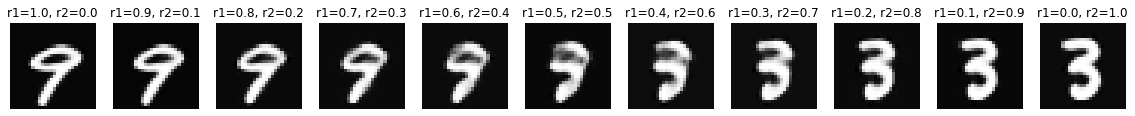

In [33]:
iter_d = iter(test_data)
dd1 = iter_d.next()[0][9].unsqueeze(dim=0)
dd2 = iter_d.next()[0][4].unsqueeze(dim=0)
zz1 = model.w_layers(model.encoder(dd1))
zz2 = model.w_layers(model.encoder(dd2))
print_z1z2(model, zz1, zz2)

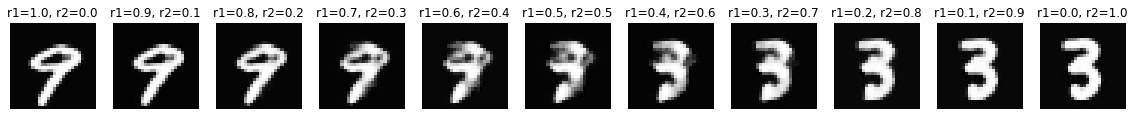

In [34]:
# you can skip, compare with vanilla autoencoder
vz1 = ae_model.encoder(dd1)
vz2 = ae_model.encoder(dd2)
print_z1z2(ae_model, vz1, vz2)

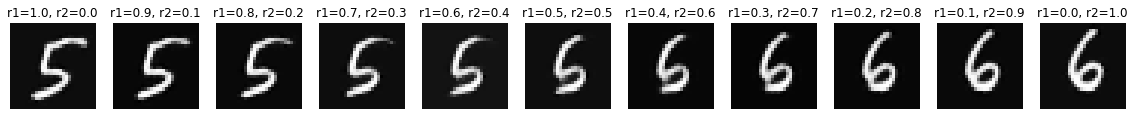

In [35]:
iter_d = iter(test_data)
dd1 = iter_d.next()[0][23].unsqueeze(dim=0)
dd2 = iter_d.next()[0][27].unsqueeze(dim=0)
zz1 = model.w_layers(model.encoder(dd1))
zz2 = model.w_layers(model.encoder(dd2))
print_z1z2(model, zz1, zz2)

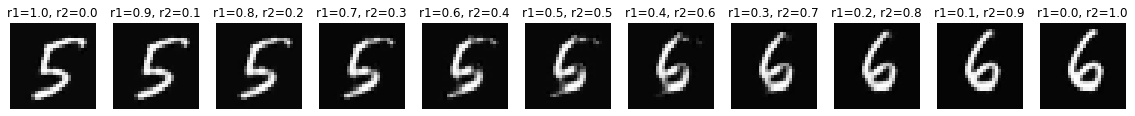

In [36]:
# you can skip, compare with vanilla autoencoder
vz1 = ae_model.encoder(dd1)
vz2 = ae_model.encoder(dd2)
print_z1z2(ae_model, vz1, vz2)

You can see it learn more detail and proper transform between two shape(or latent)